In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib

In [2]:
#function for plotting the graphs
def plotting(y_pred,w_pred,y_truth,w_truth):
    fig=plt.figure(1)
    #plotting predicted histogram
    plt.subplot2grid((5,3),(0,0), rowspan=4,colspan=4)
    plt.hist(y_pred,weights=w_pred,bins=13,range=[-0.5,12.5],alpha=0.5,label='predicted histogram')
    #plotting truth histogram error
    htruth=np.histogram(y_truth,weights=w_truth,bins=13,range=[-0.5,12.5])
    htruth_e=np.histogram(y_truth,weights=w_truth**2,bins=13,range=[-0.5,12.5])
    err_y=np.sqrt(htruth_e[0])
    err_x=np.ones_like(htruth[0])*0.5
    x=np.arange(0,13,step=1)
    plt.errorbar(x,htruth[0],yerr=err_y,xerr=err_x,ecolor='black',elinewidth='0.5',fmt='none',label='$\sigma_{true}$')
    plt.legend()
    plt.ylabel('Events')
    plt.yscale('log')
    #plotting truth/pred plot 
    plt.subplot2grid((5,3),(4,0),rowspan=2,colspan=4)
    hpred=np.histogram(y_pred,weights=w_pred,bins=13,range=[-0.5,12.5])
    ratio=htruth[0]/hpred[0]
    plt.plot(x,ratio,'bo',markersize=2)
    plt.ylim(0.8,1.2)
    #plotting error in truth/pred plot
    err_y=np.sqrt(htruth_e[0])/hpred[0]
    err_x=np.ones_like(x)*0.5
    plt.errorbar(x,ratio,yerr=err_y,xerr=err_x,ecolor='black',elinewidth='0.5',fmt='none')
    plt.ylabel('true/pred')
    plt.xlabel('Category')
    fig.set_size_inches(7, 9)
    plt.show()
    plt.close()

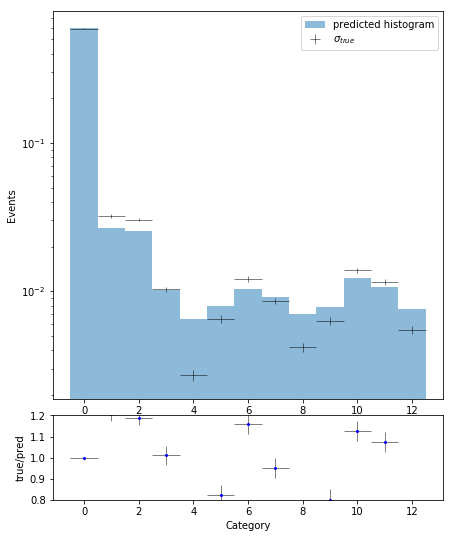

In [3]:
#no reweight
X_test=pd.read_hdf("X_test.hd5")
y_test=pd.read_hdf("y_test.hd5")
w_test=pd.read_hdf("w_test.hd5")
clf = joblib.load('clf.joblib') 

#predicting probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
#predicting weight of each data in test set according to category 
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

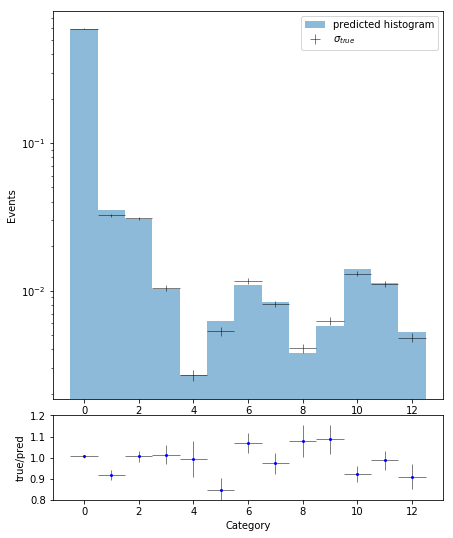

In [4]:
#reweight clipped at 50
X_test=pd.read_hdf("X_test_50.hd5")
y_test=pd.read_hdf("y_test_50.hd5")
w_test=pd.read_hdf("w_test_50.hd5")
rw=np.loadtxt("rw_50.txt")
clf = joblib.load('clf_50.joblib')

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

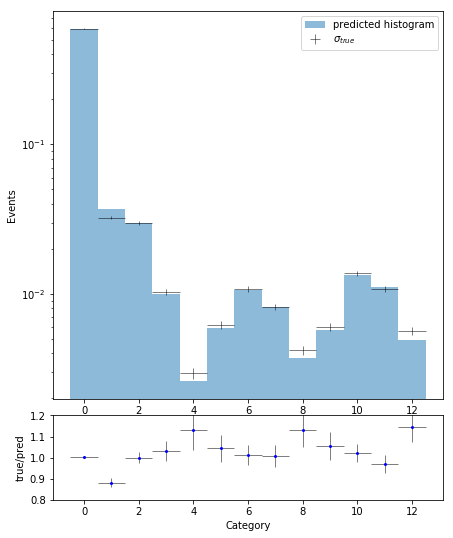

In [5]:
#reweight clipped at 25
X_test=pd.read_hdf("X_test_25.hd5")
y_test=pd.read_hdf("y_test_25.hd5")
w_test=pd.read_hdf("w_test_25.hd5")
rw=np.loadtxt("rw_25.txt")
clf = joblib.load('clf_25.joblib')

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

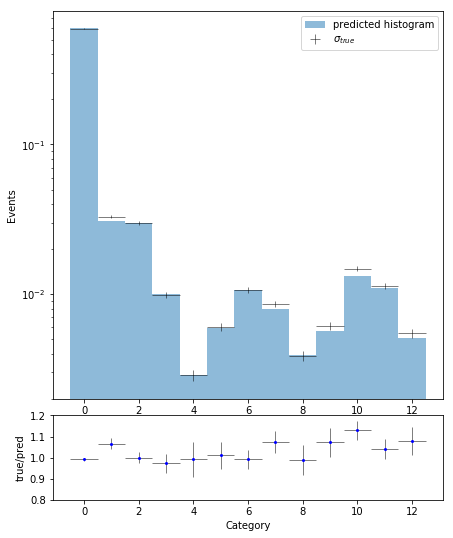

In [6]:
#reweight clipped at 10
X_test=pd.read_hdf("X_test_10.hd5")
y_test=pd.read_hdf("y_test_10.hd5")
w_test=pd.read_hdf("w_test_10.hd5")
rw=np.loadtxt("rw_10.txt")
clf = joblib.load('clf_10.joblib')

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

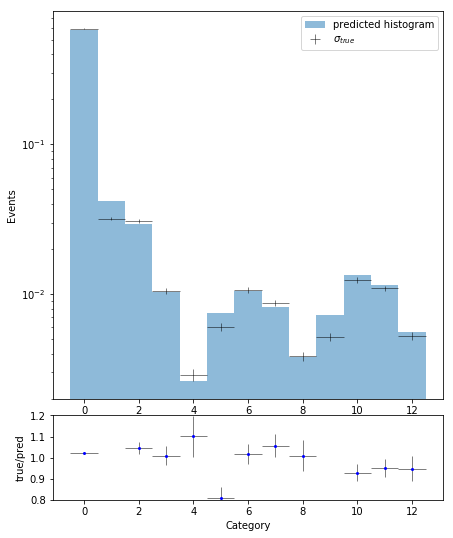

In [7]:
#reweight clipped at 75
X_test=pd.read_hdf("X_test_75.hd5")
y_test=pd.read_hdf("y_test_75.hd5")
w_test=pd.read_hdf("w_test_75.hd5")
rw=np.loadtxt("rw_75.txt")
clf = joblib.load('clf_75.joblib')

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

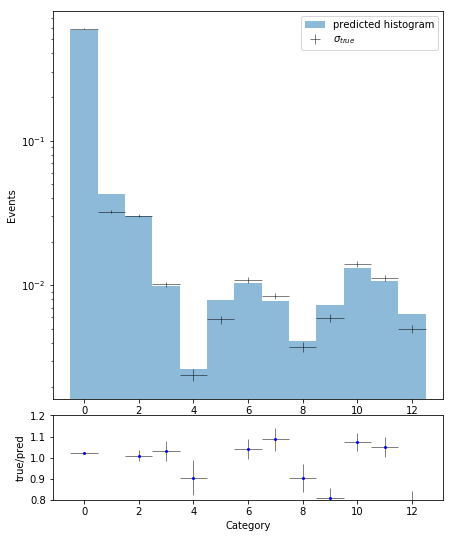

In [8]:
#reweight clipped at 90
X_test=pd.read_hdf("X_test_90.hd5")
y_test=pd.read_hdf("y_test_90.hd5")
w_test=pd.read_hdf("w_test_90.hd5")
rw=np.loadtxt("rw_90.txt")
clf = joblib.load('clf_90.joblib')

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)